# Wine Classification Algorithms

## Importing Libraries

In [263]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
%matplotlib inline

## Loading / Processing Data

In [146]:
#importing data
feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

col_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv('wine.csv', header = None, names=col_names)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# Analyzing dara


#Checking for NaN values

df.isna().sum()

#No NaN Values found

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

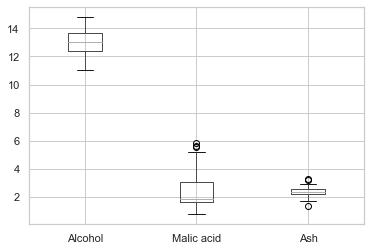

In [74]:
# Outlier analysis 


df.iloc[:,1:4].boxplot()

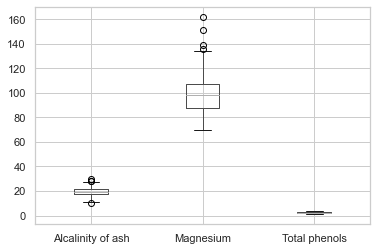

In [70]:
df.iloc[:,4:7].boxplot()

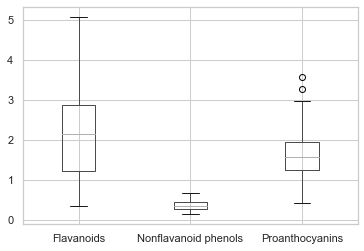

In [71]:
df.iloc[:,7:10].boxplot()

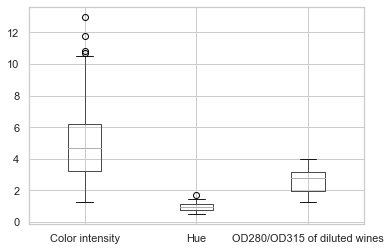

In [72]:
df.iloc[:,10:13].boxplot()



It appears that we have outliers in the following columns: 




Hue

Color Intensity 

Proanthocyanins

Ash

Malic Acid

Magnesium 

Alcalinity of Ash


In [147]:
#Removing Outliers

from scipy import stats
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [149]:
#dataset without outliers, 10 rows have been removed. 
new_df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


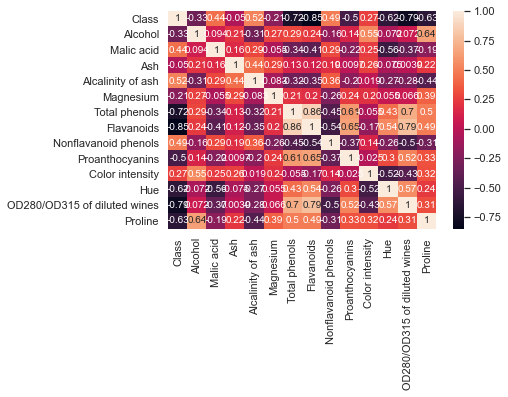

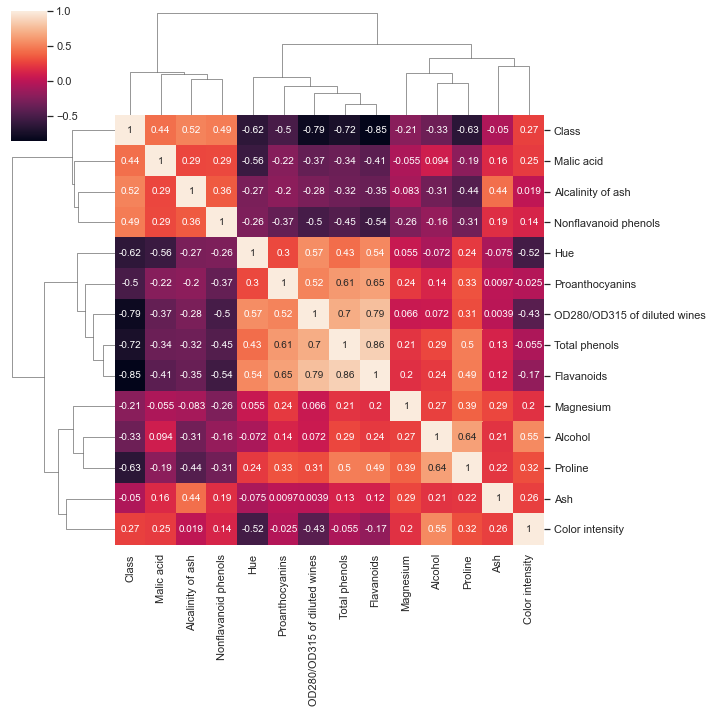

In [219]:
#Checking for highly correlated features, removing those features may improve performance


# calculate the correlations
correlations = df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


Removing outliers causes a decrease in test_set accuracy for both train-test validation approach and 
10 fold cross validation approach when making decision trees. Therefore I will be moving forward with the 
original dataset. 



## Decision Trees

### Train Test Split Approach

In [248]:
#split dataset in features and target variable
feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [250]:
#Evaluation 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy =', round(score,3)*100,'%')


Accuracy = 95.6 %


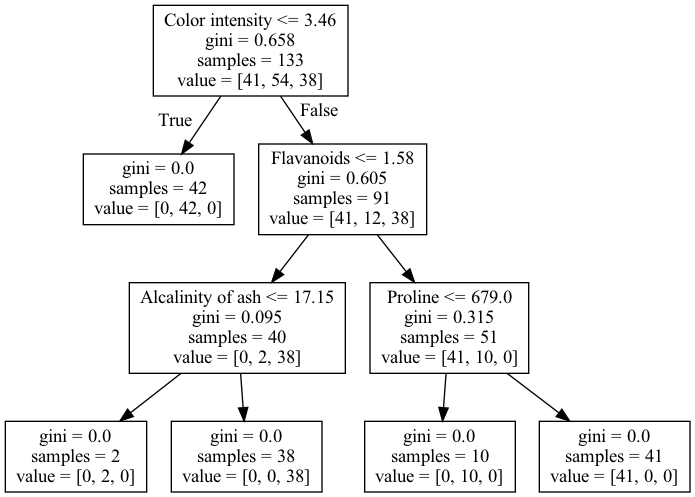

In [133]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_cols)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### 10 Fold Cross Validation Approach 

In [251]:
#feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
#'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

'''
Adjusting for the variables with higher predictive power results in higher accuracy. 
Therefore only these variables are used in the 10-fold cross validation resulting in an 
accuracy greater than 90%. 

'''

feature_cols = ['Alcalinity of ash' , 'Flavanoids', 'Color intensity','Proline']

X = df[feature_cols] # Features
y = df['Class'] # Target variable

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


score = np.mean(cross_val_score(clf, X, y, cv=10, scoring = 'accuracy'))

print('Accuracy =', round(score,3)*100,'%')


Accuracy = 92.7 %


# Ensemble Random Forest

In [252]:
feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

clf = RandomForestClassifier(n_estimators=10)

score = np.mean(cross_val_score(clf, X, y, cv=10, scoring = 'accuracy'))
print('Accuracy =', round(score,3)*100,'%')

Accuracy = 95.5 %


Random forest performs better than decision tree classifier because it prevents overfittiing by 
using multiple trees. While decision trees are less computationally expensive, they are not as accurate as 
random forests. 


In this code, decision tree classifier accuracy is around 90%-95%, whereas ensemble random forest gives accuracy up to 
97%. 

# KNN

In [253]:
'''
Preparing the dataset by normaliziing features. 
'''

feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable


#normalizinig the dataset 
X = X.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


## KNN with 10 Nearest Neighbours

In [254]:
'''
KNN with 10 nearest neighbours and 10 fold cross validation
'''

knn_1 = KNeighborsClassifier(n_neighbors=10)

score = np.mean(cross_val_score(knn_1, X, y, cv=10))

print('Accuracy =', round(score,3)*100,'%')

Accuracy = 96.6 %


## KNN with Varying values of K (1 - 50) 

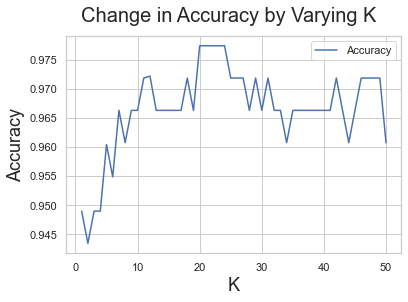

Highest Accuracy = 97.7 % is Achieved when K = 20


In [255]:
acc = list()
K = list()


for k in range (50):
    k += 1
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    K.append(k)
    score = np.mean(cross_val_score(knn_1, X, y, cv=10, scoring = 'accuracy'))
    acc.append(score)
    
    
plt.plot(K, acc)
plt.legend(['Accuracy', 'K'])
plt.suptitle('Change in Accuracy by Varying K', fontsize=20)
plt.xlabel('K', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()


max_K = acc.index(max(acc))+1
print('Highest Accuracy =', round(max(acc), 3)*100, '% is Achieved when K =',max_K)

Varyinig K makes a substantial difference when going from K=1 to K=10. 

# Naive Bayes 

## Multinomial NB

In [256]:
#startinig off by using all features

feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable


nb1 = MultinomialNB(alpha = 0.1)

#laplace smoothing parameter (alpha) set to 0.1 leads to highest accuracy

score = np.mean(cross_val_score(nb1, X.values, y.values, cv=10, scoring = 'accuracy'))

print('Accuracy =', round(score,3)*100,'%')

Accuracy = 86.1 %


## Gaussian NB

In [233]:
feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable


nb2 = GaussianNB()

score = np.mean(cross_val_score(nb2, X.values, y.values, cv=10, scoring = 'accuracy'))

print('Accuracy =', round(score,3)*100,'%')

Accuracy = 97.8 %


GaussianNB appears to perform better than MultinomialNB. Likely because we have numerical data in decimal form whereas MultinomialNB works better with discrete/categorical data. 

# Support Vector Classifier (SVC)

In [262]:
'''
Preparing the dataset by normaliziing features. 
'''

feature_cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 'Flavanoids', 
'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df[feature_cols] # Features
y = df['Class'] # Target variable


#normalizinig the dataset 
X = X.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


## 10 Fold CV with rbf (default scikit-learn) kernel

In [267]:
svc1 = SVC(gamma='auto')
score = np.mean(cross_val_score(svc1, X.values, y.values, cv=10, scoring = 'accuracy'))

print('Accuracy =', round(score,3)*100,'%')

Accuracy = 97.8 %


## Varying kernels for SVC

In [284]:
kernels = ['linear', 'sigmoid', 'poly']
acc = list()

for i in kernels: 
    svc2 = SVC(kernel = i, gamma='auto')
    score = np.mean(cross_val_score(svc2, X.values, y.values, cv=10, scoring = 'accuracy'))
    acc.append(score)

Text(0.5, 1.0, 'Accuracy of SVC in Different Kernels')

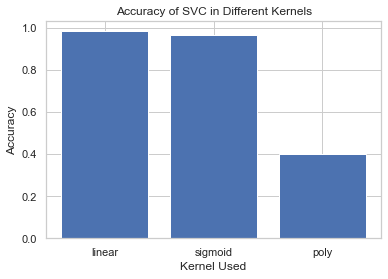

In [289]:
plt.bar(kernels, acc, width=0.8, bottom=None, align='center')
plt.xlabel('Kernel Used')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVC in Different Kernels')

In [302]:
print('Accuracy with Linear Kernal =', round(acc[0],3)*100, '%')
print('Accuracy with Sigmoid Kernal =', round(acc[1],3)*100, '%')
print('Accuracy with Poly Kernal =', round(acc[2],2)*100, '%')

Accuracy with Linear Kernal = 98.3 %
Accuracy with Sigmoid Kernal = 96.7 %
Accuracy with Poly Kernal = 40.0 %


# Results

SVC with the linear kernel gives a 98.3% accuracy with 10 fold cross validation which is the highest accuracy among all the models tested. 
